In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [145]:
df = pd.read_csv(r"H:\DataScience\DataScience2020_DataScience_MachineLearninginPython\7. Convolutional Neural Networks (CNNs)\creditcard.csv")

In [146]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [148]:
df.Class.unique().tolist()

[0, 1]

In [149]:
#df.Class.value_counts()

#creating two seperate dataset of valid and fraud
valid = df[df['Class']==0]
fraud = df[df['Class']==1]

In [150]:
valid.shape, fraud.shape

((284315, 31), (492, 31))

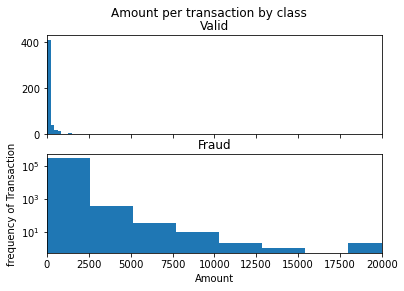

In [151]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins=10)
ax2.set_title('Fraud')
ax2.hist(valid.Amount, bins=10)
ax1.set_title('Valid')
plt.xlabel('Amount')
plt.ylabel('frequency of Transaction')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

In [152]:
df1 = df.sample(frac=0.1, random_state=1)
df1.shape

(28481, 31)

In [153]:
valid = df1[df1['Class']==0]
fraud = df1[df1['Class']==1]
valid.shape, fraud.shape

((28432, 31), (49, 31))

In [154]:
df1.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,0.035939,-0.237613,0.126985,-0.069353,-0.093264,-0.182255,0.007392,-0.074555,0.083959,0.019469,-0.050967,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,0.010686,0.007177,-0.012290,-0.018849,-0.001905,-0.012884,-0.015569,-0.009644,-0.011822,0.003860,-0.017883,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,0.017218,-0.002982,0.000646,0.001655,-0.006617,0.002046,-0.003062,0.003567,-0.005922,0.011950,-0.054467,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,-0.006955,0.000836,-0.008236,0.004030,-0.016702,0.004421,-0.012780,-0.017722,0.001056,0.020282,0.003068,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,-0.000669,0.007657,0.005942,-0.011637,0.003485,-0.000575,-0.004783,0.012553,0.001852,0.001759,0.015348,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.019888,0.009666,0.013997,-0.003708,1.000000,-0.016656,-0.037463,-0.013263,-0.008506,0.011446,0.006286,-0.011393,-0.002728,0.001548,-0.006731,-0.014823,-0.013090,0.000902,0.001468,0.005350,0.002288,0.022065,0.064703,-0.007184,0.006493,0.000048,-0.027934,0.010991,-0.397437,-0.073519
V6,-0.060483,0.006417,-0.004411,-0.006903,0.002029,-0.016656,1.000000,0.006923,0.003695,-0.002762,-0.003120,0.001582,-0.000219,-0.001591,-0.007828,0.006407,0.009237,0.009201,-0.002719,-0.005205,-0.008991,0.004490,-0.003705,-0.036726,0.001428,-0.015012,0.009938,-0.004811,-0.009772,0.213007,-0.035085
V7,0.078924,-0.020583,-0.013456,-0.024640,0.004432,-0.037463,0.006923,1.000000,-0.028291,-0.005510,-0.035149,0.000863,-0.008740,0.002445,-0.001300,-0.003969,-0.010928,-0.017525,-0.015221,0.002621,0.023011,0.007012,-0.013871,-0.055242,0.002899,-0.016941,-0.000075,-0.012973,-0.037593,0.417814,-0.134247
V8,-0.040474,-0.003013,0.015662,-0.025529,0.011659,-0.013263,0.003695,-0.028291,1.000000,-0.018645,-0.017995,-0.002562,-0.009387,0.012011,-0.001876,-0.000946,-0.000048,-0.020343,-0.013191,0.003453,0.013911,-0.005651,-0.004195,0.030092,-0.008821,0.017298,0.015385,0.008495,0.015525,-0.102221,0.024896
V9,-0.008428,0.001658,0.003456,0.002525,-0.004395,-0.008506,-0.002762,-0.005510,-0.018645,1.000000,-0.021718,0.000587,0.002794,0.001733,0.004310,-0.014436,0.000286,-0.007033,-0.001036,-0.003865,-0.012547,0.009462,-0.002297,0.002360,0.007441,-0.009149,-0.003652,-0.011701,-0.026290,-0.039773,-0.079962


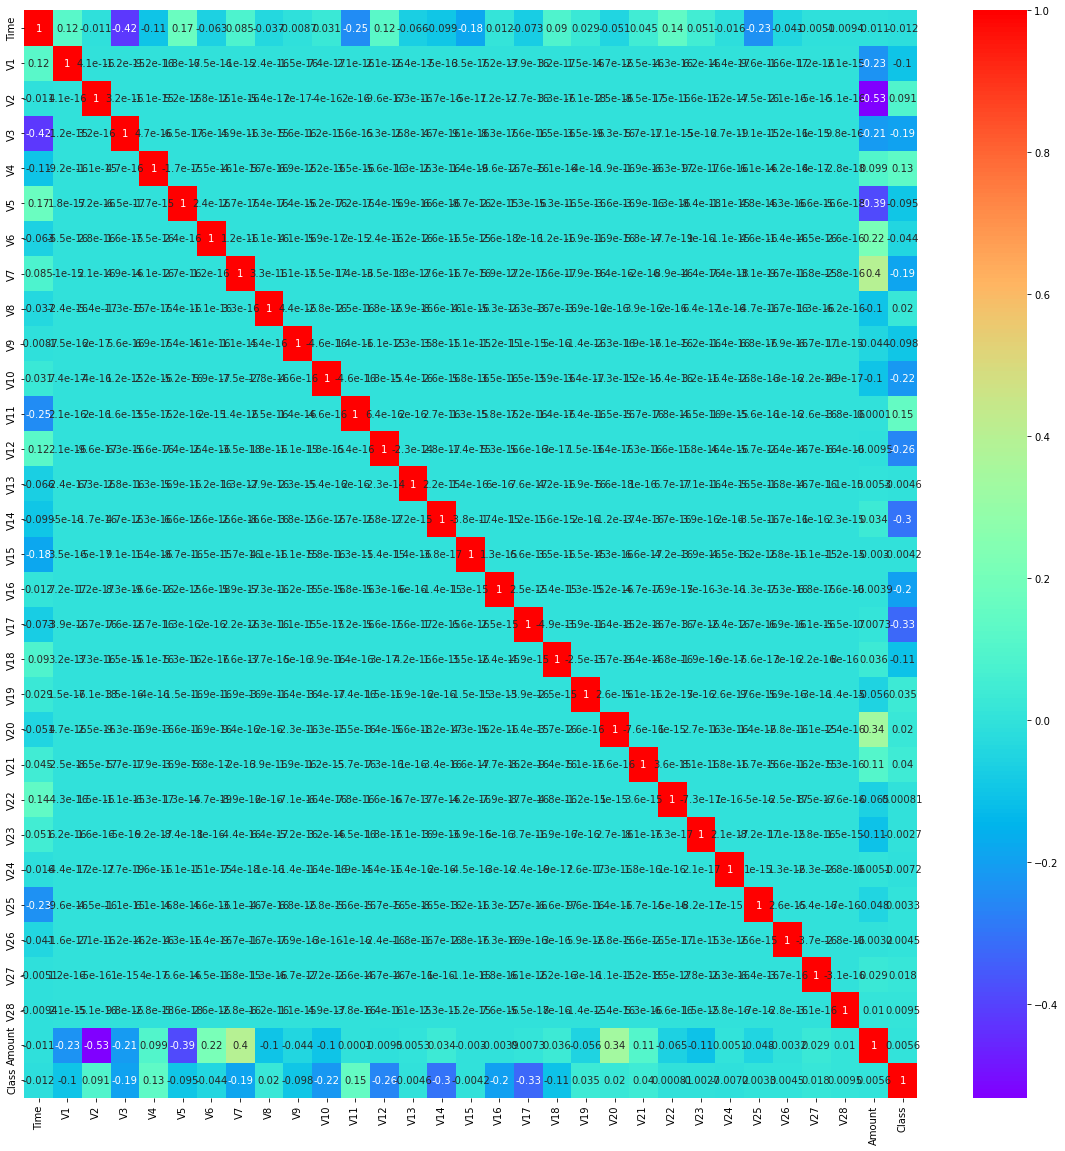

In [155]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='rainbow', annot=True)
plt.show()

In [156]:
x = df1.drop(['Class'], axis=1)
y = df1['Class']

In [157]:
x.shape, y.shape

((28481, 30), (28481,))

In [158]:
x.ndim, y.ndim

(2, 1)

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [167]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

x_train.shape, x_test

((22784, 30),
 array([[ 0.6438989 , -0.30498255, -0.1248023 , ...,  0.64608076,
          0.32403656, -0.27945448],
        [-0.31690147, -0.10169296,  0.48176204, ...,  0.12678534,
          0.46245501, -0.26964148],
        [-0.50491934, -0.99410978, -0.42760794, ...,  0.09297651,
          0.60444067,  2.40580155],
        ...,
        [-0.91453423,  0.36579703, -0.49654606, ..., -0.09359817,
          0.19164676,  0.56014192],
        [-0.66051455, -0.36109503,  0.70631666, ...,  0.94251029,
          0.88901492, -0.26177691],
        [ 0.71580912, -0.0037451 ,  0.12268562, ...,  0.18769447,
          0.67686426, -0.03873476]]))

In [168]:
y_train.shape, y_test.shape

((22784,), (5697,))

In [169]:
'''
for image input data should be of shape = batch_size X height X width X depth

for tabular data, input data should be of shape = batch_size X height X width (depth is not required)

input_shape for image input = (height X width X depth)

input_shape for tabular data = (height X width)
'''

x_train = x_train.reshape(22784, 30, 1)
x_test = x_test.reshape(5697, 30, 1)
x_train.shape, x_test

((22784, 30, 1),
 array([[[ 0.6438989 ],
         [-0.30498255],
         [-0.1248023 ],
         ...,
         [ 0.64608076],
         [ 0.32403656],
         [-0.27945448]],
 
        [[-0.31690147],
         [-0.10169296],
         [ 0.48176204],
         ...,
         [ 0.12678534],
         [ 0.46245501],
         [-0.26964148]],
 
        [[-0.50491934],
         [-0.99410978],
         [-0.42760794],
         ...,
         [ 0.09297651],
         [ 0.60444067],
         [ 2.40580155]],
 
        ...,
 
        [[-0.91453423],
         [ 0.36579703],
         [-0.49654606],
         ...,
         [-0.09359817],
         [ 0.19164676],
         [ 0.56014192]],
 
        [[-0.66051455],
         [-0.36109503],
         [ 0.70631666],
         ...,
         [ 0.94251029],
         [ 0.88901492],
         [-0.26177691]],
 
        [[ 0.71580912],
         [-0.0037451 ],
         [ 0.12268562],
         ...,
         [ 0.18769447],
         [ 0.67686426],
         [-0.03873476]]]))

In [172]:
print(type(y_train))
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()
y_train = y_train.reshape(22784, 1)
y_test = y_test.reshape(5697, 1)
y_train, y_test

<class 'numpy.ndarray'>


(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64))

# Building the Model

In [173]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, BatchNormalization, MaxPool1D, Flatten

'''
Batch Normalization is the technique that allows every layer of the network to do learning more independently. 
It is used to normalize the output of the previous layers.
'''

'\nBatch Normalization is the technique that allows every layer of the network to do learning more independently. \nIt is used to normalize the output of the previous layers.\n'

In [174]:
model = Sequential([
    #1st layer
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),
    
    #2nd layer
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),
    
    #Output layer
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [175]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 30, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 32)            2080      
                                                                 
 batch_normalization_3 (Batc  (None, 15, 32)          

In [176]:
'''
Compile
fit 
evaluate
'''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [177]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
712/712 [==============================] - 44s 19ms/step - loss: 0.0181 - accuracy: 0.9975 - val_loss: 0.0101 - val_accuracy: 0.9993
Epoch 2/10
712/712 [==============================] - 8s 11ms/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.0103 - val_accuracy: 0.9995
Epoch 3/10
712/712 [==============================] - 8s 11ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0096 - val_accuracy: 0.9989
Epoch 4/10
712/712 [==============================] - 13s 18ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0053 - val_accuracy: 0.9995
Epoch 5/10
712/712 [==============================] - 11s 16ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0096 - val_accuracy: 0.9993
Epoch 6/10
712/712 [==============================] - 10s 14ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0082 - val_accuracy: 0.9993
Epoch 7/10
712/712 [==============================] - 13s 19ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0085 - val_accuracy: 0

In [178]:
model.evaluate(x_test, y_test)

179/179 [==============================] - 2s 9ms/step - loss: 0.0059 - accuracy: 0.9995


[0.0059145111590623856, 0.9994733929634094]

In [184]:
'''
this is importatnt step of y_pred:-
'''
y_pred=(model.predict(x_test)> 0.5).astype("int32")
y_pred,y_test, y_test.reshape(len(y_test), 1)

179/179 [==============================] - 2s 8ms/step


(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64))

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
a_s = accuracy_score(y_test, y_pred)
cm, a_s

(array([[5689,    1],
        [   2,    5]], dtype=int64),
 0.9994734070563455)